# HSC vs MPP Clone Abundance Comparison
Comparison done for `figure 3` as an initial look at clone level data

In [27]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import data_utils.data_loader as ld
import plot_utils.format_axis as fmt
import plot_utils.overlay_plots as op
import importlib

In [43]:
importlib.reload(ld)
loader = ld.HSPC_data_loader('../primary_config.json')
palette = ld.load_config('../color_palette.json')

Finding data files from: /Users/akre96/Data/Human_HSPC_Project/Primary recipients /STEP 7
	Found 13 files
Loading and transforming to long format
Marking parent cells by library ID
Validating data
Data Validation Passed


In [16]:
data = loader.data
data.groupby('condition')['abundance'].describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
Busulfan,379.0,0.414341,1.622730,0.0,0.007157,0.048130,0.179179,22.255805
Irradiation,245.0,0.703528,3.025763,0.0,0.007634,0.039296,0.144437,27.606305
Unconditioned,234.0,0.506660,2.269363,0.0,0.000000,0.015408,0.161714,20.073078


/Users/akre96/Code/RongLuLab/HSPC_project/venv/lib/python3.7/site-packages/seaborn/categorical.py:2971: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


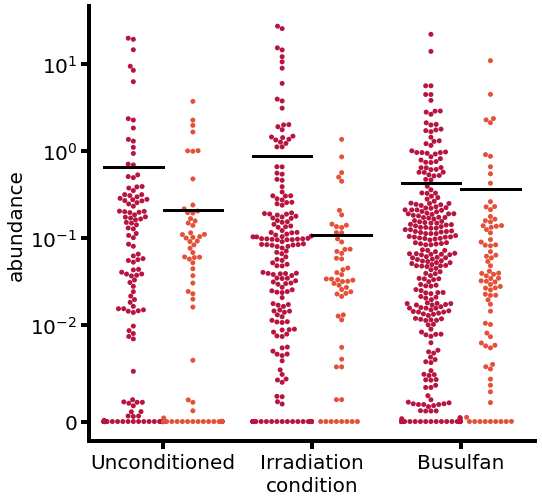

In [46]:
importlib.reload(op)
fig, ax = plt.subplots(figsize=(8,8))

ax.set_yscale('symlog', linthreshy=.01)
op.dot_line_overlay(
    x='condition',
    y='abundance',
    hue='parent_cell_type',
    hue_order=['hsc', 'mpp'],
    split=True,
    data=data,
    ax=ax,
    palette=palette['cell_type'],
    linewidth=3,
    show_mean=True
)
ax.legend().remove()
fmt.despine_thicken_axes(ax, fontsize=20)